### Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II
Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [121]:
df = pd.read_csv("/Users/mailysjaffret/IronHack/EDA/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective:** Understand the relationship between product categories and their best-seller status.

**1- Crosstab Analysis:** 

Create a crosstab between the product category and the isBestSeller status.
Are there categories where being a best-seller is more prevalent?
Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

**2- Statistical Tests:**

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

**3- Visualizations:**

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [124]:
#1-1-
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [126]:
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

sorted_crosstab = crosstab_prop.sort_values(by=True, ascending=False)
sorted_crosstab

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


This table means that for the Grocery category, approximately 5,81% of the products are best-sellers.

In [129]:
#1-2-
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

- p_value < 0,5 : means that there is a statistically significant association between the product category and the best-seller status.
- we reject the null hypothesis of the Chi-square test.

In [132]:
from scipy.stats.contingency import association
association(crosstab, method="cramer")

0.1222829439760564

A Cramér's value of 0.1223 suggest a weak association between product category and best-seller status (0 minimum/1maximum).

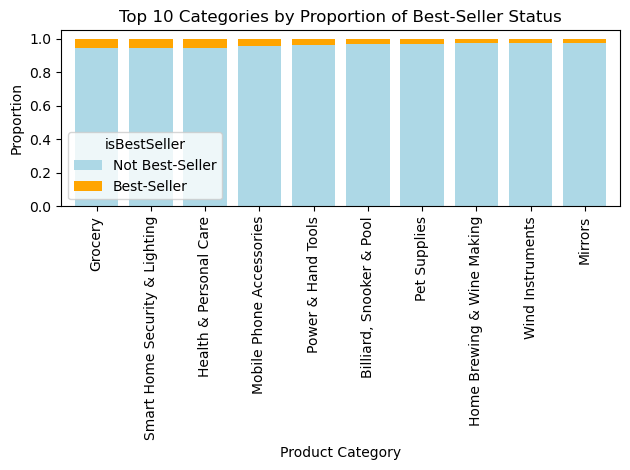

In [135]:
#1-3-
top_categories = crosstab_prop.sort_values(by=True, ascending=False).head(10)
top_categories.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], width=0.8)

plt.title('Top 10 Categories by Proportion of Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.xticks(rotation=90) 
plt.legend(title='isBestSeller', labels=['Not Best-Seller', 'Best-Seller'])

plt.tight_layout()
plt.show()

Look at the 10 categories with the most bestsellers, and we can see that the orange who represents bestsellers by category still relatively small.


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective:** Investigate how different product categories influence product prices.

**0- Preliminary Step:** Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

**1- Violin Plots:**

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

**2- Bar Charts:**

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

**3- Box Plots:**

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [150]:
#2-0-
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


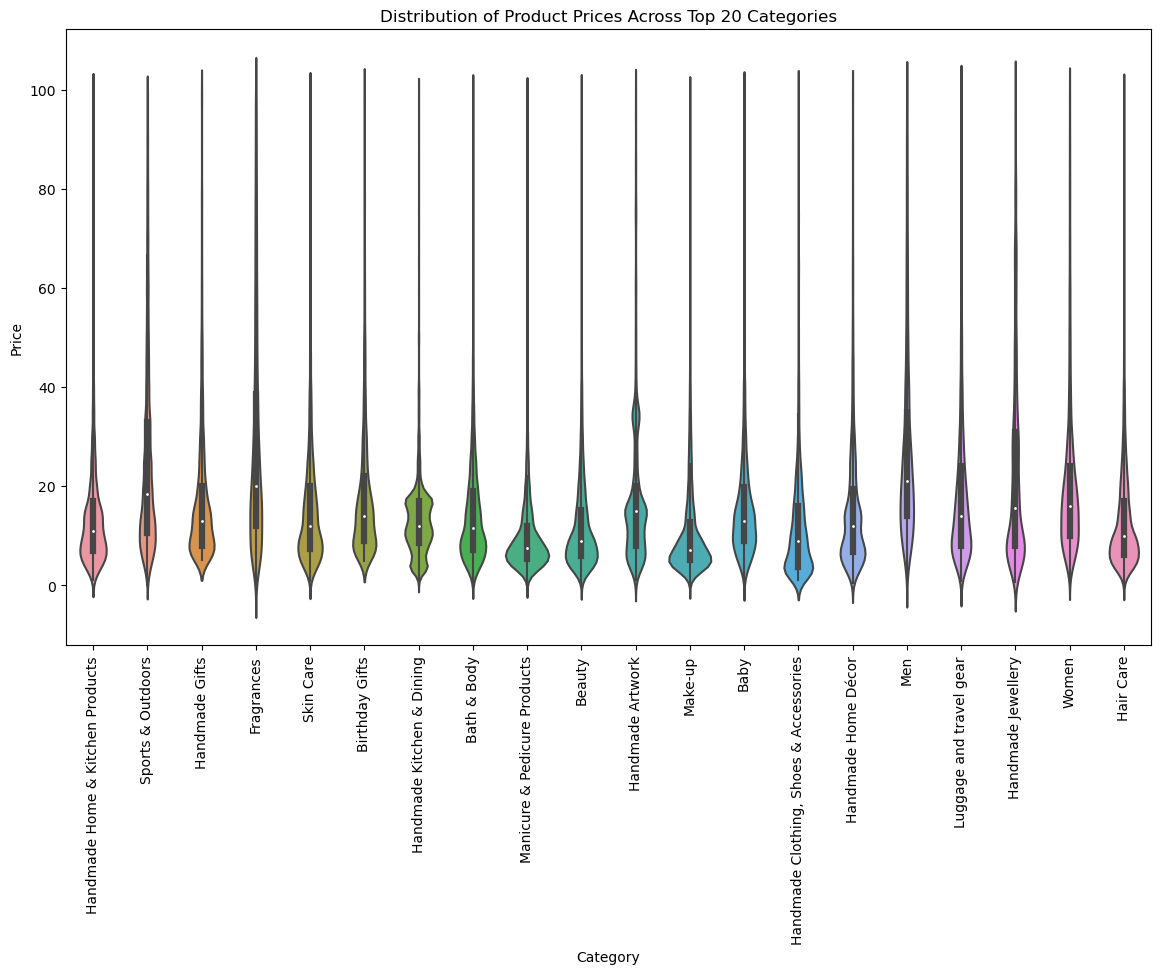

In [154]:
#2-1- Violon plot visualize the distribution of price across different product categories
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=df_top_20)
plt.xticks(rotation=90)  
plt.title('Distribution of Product Prices Across Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

In [160]:
#2-1- Highest median price
median_prices = df_no_outliers.groupby('category')['price'].median()

highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(highest_median_category)
print(highest_median_price)

Desktop PCs
74.0


The category product who have the highest median price is "Desktop PCs" = 74.
This product category is not in the top 20, which seems logical since computers are more expensive products (higher median), and we buy them less often.

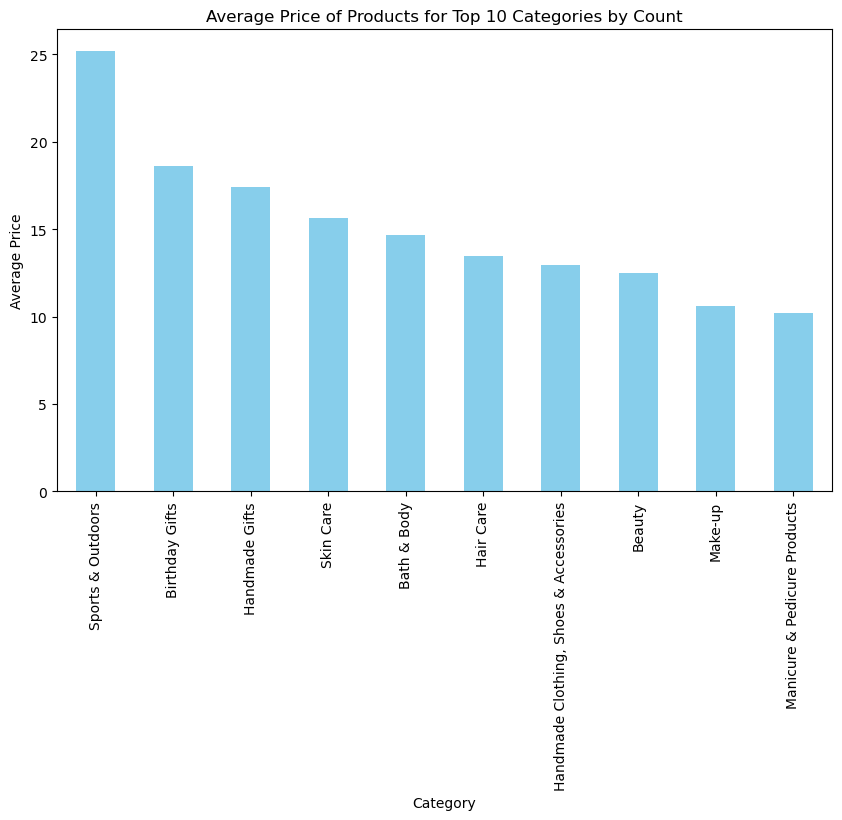

In [169]:
#2-2- Bar chart comparing the average price of products for the top 10 product categories (based on count)
top_10_categories_by_count = df_no_outliers['category'].value_counts().head(10).index
average_prices = df_no_outliers.groupby('category')['price'].mean()

# Filter to keep only the top 10 categories
average_prices_top_10 = average_prices[top_10_categories_by_count]

plt.figure(figsize=(10, 6))
average_prices_top_10.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Categories by Count')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

In [175]:
#2-2-
average_prices = df_no_outliers.groupby('category')['price'].mean()

highest_average_category = average_prices.idxmax()
highest_average_price = average_prices.max()

print(highest_average_category)
print(highest_average_price)

Motherboards
68.77243243243242


The category product who have the highest mean price is "Motherboards" = 68,77. This product category is not in the top 10, which seems logical since motherboards are more expensive products, and we buy them less often.

The product category with the highest median star rating among the top 10 categories is 'Bath & Body' with a median rating of 4.40.


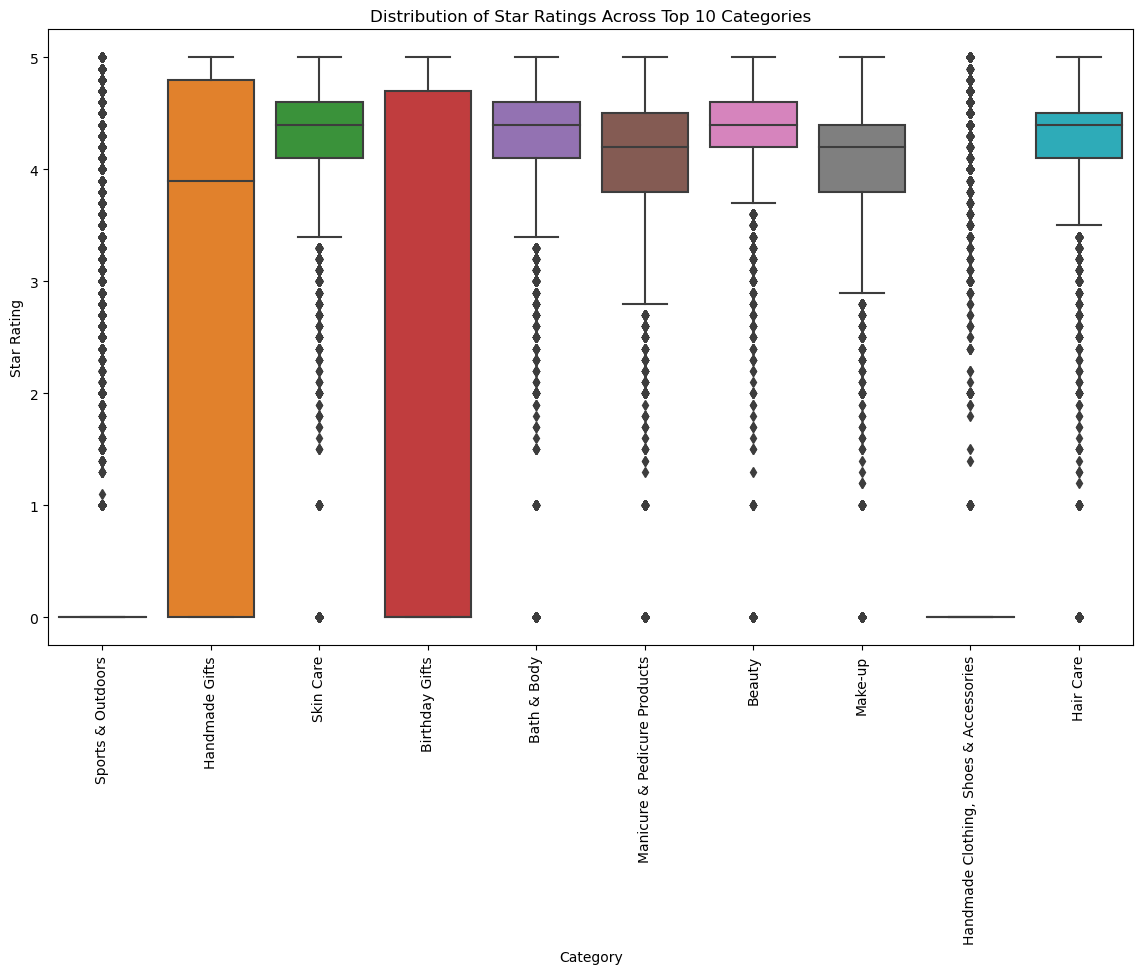

In [196]:
#2-3-
top_10_categories_by_count = df_no_outliers['category'].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories_by_count)]

# Calculate the median star rating for each category within the top 10
median_ratings_top_10 = df_top_10.groupby('category')['stars'].median()

# Identify the category with the highest median star rating among the top 10
highest_median_star_category = median_ratings_top_10.idxmax()
highest_median_star = median_ratings_top_10.max()

print(f"The product category with the highest median star rating among the top 10 categories is '{highest_median_star_category}' with a median rating of {highest_median_star:.2f}.")

plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=df_top_10)
plt.xticks(rotation=90)  
plt.title('Distribution of Star Ratings Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Star Rating')
plt.show()

In [182]:
# Calculate the median rating for each category
median_ratings = df_no_outliers.groupby('category')['stars'].median()

highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(highest_median_rating_category)
print(highest_median_rating)

Computer Memory
4.7


### Part 3: Investigating the Interplay Between Product Prices and Ratings ###

**Objective:** Analyze how product ratings (stars) correlate with product prices.

**Correlation Coefficients:**

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

**Visualizations:**

- Use a scatter plot to visualize the relationship between product rating and price.
- What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [201]:
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
correlation

-0.07767299878181352

Negative correlation between product price and ratings

<Axes: xlabel='stars', ylabel='price'>

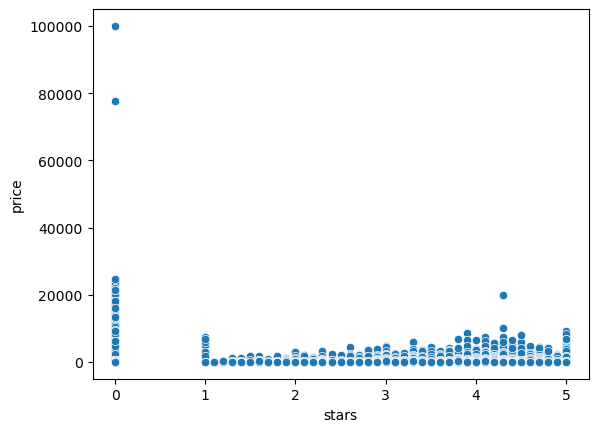

In [229]:
sns.scatterplot(data=df, x='stars', y='price')

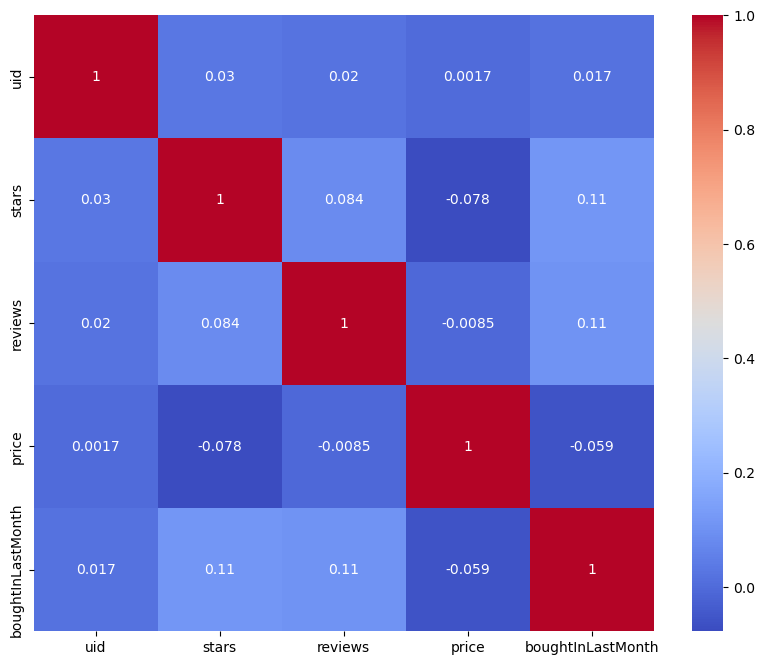

In [238]:
numeric_df = df_no_outliers.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 8))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.show()

Most of the values off-diagonal are negative or positive but very low, it means that the variables tend to have no relationship o an inverse relationship. As one variable increases, the other tends to decrease.